In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r'..\data\raw\campaign_data.csv')

In [4]:
df.head()

,campaign_id,communication_type,total_links,no_of_internal_links,no_of_images,no_of_sections,email_body,subject,email_url
0,29,Newsletter,67,61,12,3,"Dear AVians,\n \nWe are shaping up a superb da...",Sneak Peek: A look at the emerging data scienc...,http://r.newsletters.analyticsvidhya.com/7um44...
1,30,Upcoming Events,18,14,7,1,"Dear AVians,\n \nAre your eager to know what a...",[July] Data Science Expert Meetups & Competiti...,http://r.newsletters.analyticsvidhya.com/7up0e...
2,31,Conference,15,13,5,1,Early Bird Pricing Till August 07  Save upto ...,Last chance to convince your boss before the E...,http://r.newsletters.analyticsvidhya.com/7usym...
3,32,Conference,24,19,7,1,\n \nHi ?\n \nBefore I dive into why you shoul...,A.I. & Machine Learning: 5 reasons why you sho...,http://r.newsletters.analyticsvidhya.com/7uthl...
4,33,Others,7,3,1,1,Fireside Chat with DJ Patil - the master is he...,"[Delhi NCR] Fireside Chat with DJ Patil, Forme...",http://r.newsletters.analyticsvidhya.com/7uvlg...


#### Analyze Subject lines by manually reading some

In [5]:
for sub in df['subject']:
    print(sub)

Sneak Peek: A look at the emerging data science world !
[July] Data Science Expert Meetups & Competitions coming your way
Last chance to convince your boss before the Early Bird expires !
A.I. & Machine Learning: 5 reasons why you should attend DataHack Summit 2017
[Delhi NCR] Fireside Chat with DJ Patil, Former US Chief Data Scientist
[AV Newsletter] Fireside Chat with DJ Patil, DataHack Summit, and much more
Watch Live: Fireside Chat with DJ Patil
Dr Kirk Borne of Booz Allen Hamilton, to keynote at DataHack Summit 2017
[Last Day] Early Bird Offer on conference passes ENDS today
Early Bird offer expires in 2 Days. Save your spot now!
[New Webinar] Can non programmers join Big Data and Data Science roles?
Visualizing Machine Learning with Anand S, CEO of Gramener, at #DHS2017
Participate at DataHack Summit 2017 - India's largest A.I. & M.L. Conference
[September] Exciting days ahead with DataHack Summit 2017, Hackathons, Meetups and more!
Innovate and grow your business through Data Ha

In [6]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk import pos_tag, ConditionalFreqDist
from collections import Counter
import numpy as np
import re
from itertools import chain

In [7]:
# function to clean data
stops = set(stopwords.words("english"))
def cleanData(text, lowercase = False, remove_stops = False, stemming = False):
    txt = str(text)
    txt = re.sub(r'[^A-Za-z0-9\s]',r'',txt)
    txt = re.sub(r'\n',r' ',txt)
    
    if lowercase:
        txt = " ".join([w.lower() for w in txt.split()])
        
    if remove_stops:
        txt = " ".join([w for w in txt.split() if w not in stops])
    
    if stemming:
        st = PorterStemmer()
        txt = " ".join([st.stem(w) for w in txt.split()])

    return txt

#### Let's check the high frequency words

In [8]:
all_tags = []
summary_arr = []
for sub in df['subject']:
    tagged_text = pos_tag(word_tokenize(cleanData(sub, lowercase=True)))
    for txt in tagged_text:
        all_tags.append(txt)
    
freq_dict = Counter(all_tags)
    
for item in freq_dict.keys():
    summary_arr.append({
        'word': item[0],
        'freq': freq_dict.get(item),
        'is_stop': item[0] in stops,
        'tag': item[1]
    })
        # print(freq_dict.get(item))

In [9]:
summary_df = pd.DataFrame(summary_arr, columns=['word', 'freq', 'is_stop', 'tag'])

In [10]:
summary_df[(summary_df['freq'] > 3)].sort_values('freq', ascending=False)

,word,freq,is_stop,tag
7,data,23,False,NNS
109,hackathon,14,False,NN
51,and,14,True,CC
8,science,12,False,NN
15,your,9,True,PRP$
5,the,9,True,DT
42,with,8,True,IN
36,summit,8,False,NN
100,hackathons,8,False,NNS
72,in,8,True,IN


In [11]:
# Check removing stopwords
summary_df[(summary_df['is_stop'] == False) & (summary_df['freq'] > 3)].sort_values('freq', ascending=False)

,word,freq,is_stop,tag
7,data,23,False,NNS
109,hackathon,14,False,NN
8,science,12,False,NN
35,datahack,8,False,NN
37,2017,8,False,CD
36,summit,8,False,NN
100,hackathons,8,False,NNS
27,machine,8,False,NN
156,2018,7,False,CD
160,scientists,6,False,NNS


#### Extracting word counts for unigram and bigram and including them as a feture to analyze

In [12]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [13]:
clean_subs = df['subject'].map(lambda x: cleanData(x, True, True, True))

In [14]:
# Keeping minimum document frequency high to only include high frequency terms 
countvec_1 = CountVectorizer(analyzer='word', ngram_range = (1,1), min_df=4, max_features=50)
countvec_2 = CountVectorizer(analyzer='word', ngram_range = (2,2), min_df=3, max_features=50)

In [15]:
bow_1 = countvec_1.fit_transform(clean_subs)
bow_2 = countvec_2.fit_transform(clean_subs)

In [16]:
bow_1_df = pd.DataFrame(data=bow_1.todense(), columns=countvec_1.get_feature_names())
bow_2_df = pd.DataFrame(data=bow_2.todense(), columns=countvec_2.get_feature_names())

In [17]:
bow_1_df.head()

,2017,2018,ai,come,contest,data,datahack,day,go,hackathon,...,machin,mckinsey,meetup,new,opportun,scienc,scientist,summit,top,win
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,1,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [18]:
bow_2_df.head()

,air interview,chat dj,come way,data engin,data scienc,data scientist,datahack summit,dj patil,earli bird,firesid chat,...,interview opportun,ipad air,iphon ipad,machin learn,new hackathon,scienc hackathon,summit 2017,top data,win iphon,win prize
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,0,1,0,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


#### We have some new features here - 23 unigram and 24 bigram features
#### Let's concat them with campaign data & then with train data to analyze do they make any differences in the open and click rates

In [19]:
df = pd.concat([df, bow_1_df, bow_2_df], axis=1)

In [20]:
df.columns

Index(['campaign_id', 'communication_type', 'total_links',
       'no_of_internal_links', 'no_of_images', 'no_of_sections', 'email_body',
       'subject', 'email_url', '2017', '2018', 'ai', 'come', 'contest', 'data',
       'datahack', 'day', 'go', 'hackathon', 'hire', 'inr', 'learn', 'machin',
       'mckinsey', 'meetup', 'new', 'opportun', 'scienc', 'scientist',
       'summit', 'top', 'win', 'air interview', 'chat dj', 'come way',
       'data engin', 'data scienc', 'data scientist', 'datahack summit',
       'dj patil', 'earli bird', 'firesid chat', 'hackathon abinbev',
       'hackathon meetup', 'hackathon win', 'hire hackathon',
       'interview opportun', 'ipad air', 'iphon ipad', 'machin learn',
       'new hackathon', 'scienc hackathon', 'summit 2017', 'top data',
       'win iphon', 'win prize'],
      dtype='object')

In [21]:
train_df = pd.read_csv(r'..\data\raw\train.csv', parse_dates=True)

In [22]:
train_df.columns

Index(['id', 'user_id', 'campaign_id', 'send_date', 'is_open', 'is_click'], dtype='object')

In [23]:
train = pd.merge(train_df, df, on='campaign_id')

#### Let's check few terms like "ai" and "data scientist" - does their presence make any difference in the open/click rate

In [24]:
train.groupby('ai')['is_open'].sum() / train.groupby('ai')['is_open'].count()

ai
0    0.096868
1    0.147632
Name: is_open, dtype: float64

In [25]:
train.groupby('data scientist')['is_open'].sum() / train.groupby('data scientist')['is_open'].count()

data scientist
0    0.095501
1    0.203888
Name: is_open, dtype: float64

#### We can observe that people tend to open the email more when the term "data scientist" is present in the subject line.
##### To be precise, when "data scientist" is absent in the subject line, the probability of opening the email is 0.095. On the other hand, if it is present, the probability of opening the email is 0.204

In [26]:
train.groupby('data scientist')['is_click'].sum() / train.groupby('data scientist')['is_click'].count()

data scientist
0    0.012542
1    0.011449
Name: is_click, dtype: float64

In [27]:
train[(train['is_open'] == 1)].groupby('data scientist')['is_click'].sum() / train[(train['is_open'] == 1)].groupby('data scientist')['is_click'].count()

data scientist
0    0.131331
1    0.056155
Name: is_click, dtype: float64

#### Let's analyze this probability for all the features

In [28]:
# Merging the unigram and bigram features
feature_list = countvec_1.get_feature_names() + countvec_2.get_feature_names()

In [29]:
term_open_rates = []

for feature in feature_list:
    group = (train.groupby(feature)['is_open'].sum() / train.groupby(feature)['is_open'].count())
    
    if len(group) == 2:
        present = group.get_values()[1]
        absent = group.get_values()[0]
        
        term_dict = {
            'term': feature,
            'present open rate': present,
            'absent open rate': absent
        }
        term_open_rates.append(term_dict)

In [30]:
term_open_rate_df = pd.DataFrame(term_open_rates)

In [31]:
term_open_rate_df.head()

,absent open rate,present open rate,term
0,0.090276,0.201196,2018
1,0.096868,0.147632,ai
2,0.101896,0.092036,come
3,0.125645,0.075624,datahack
4,0.111886,0.047467,day


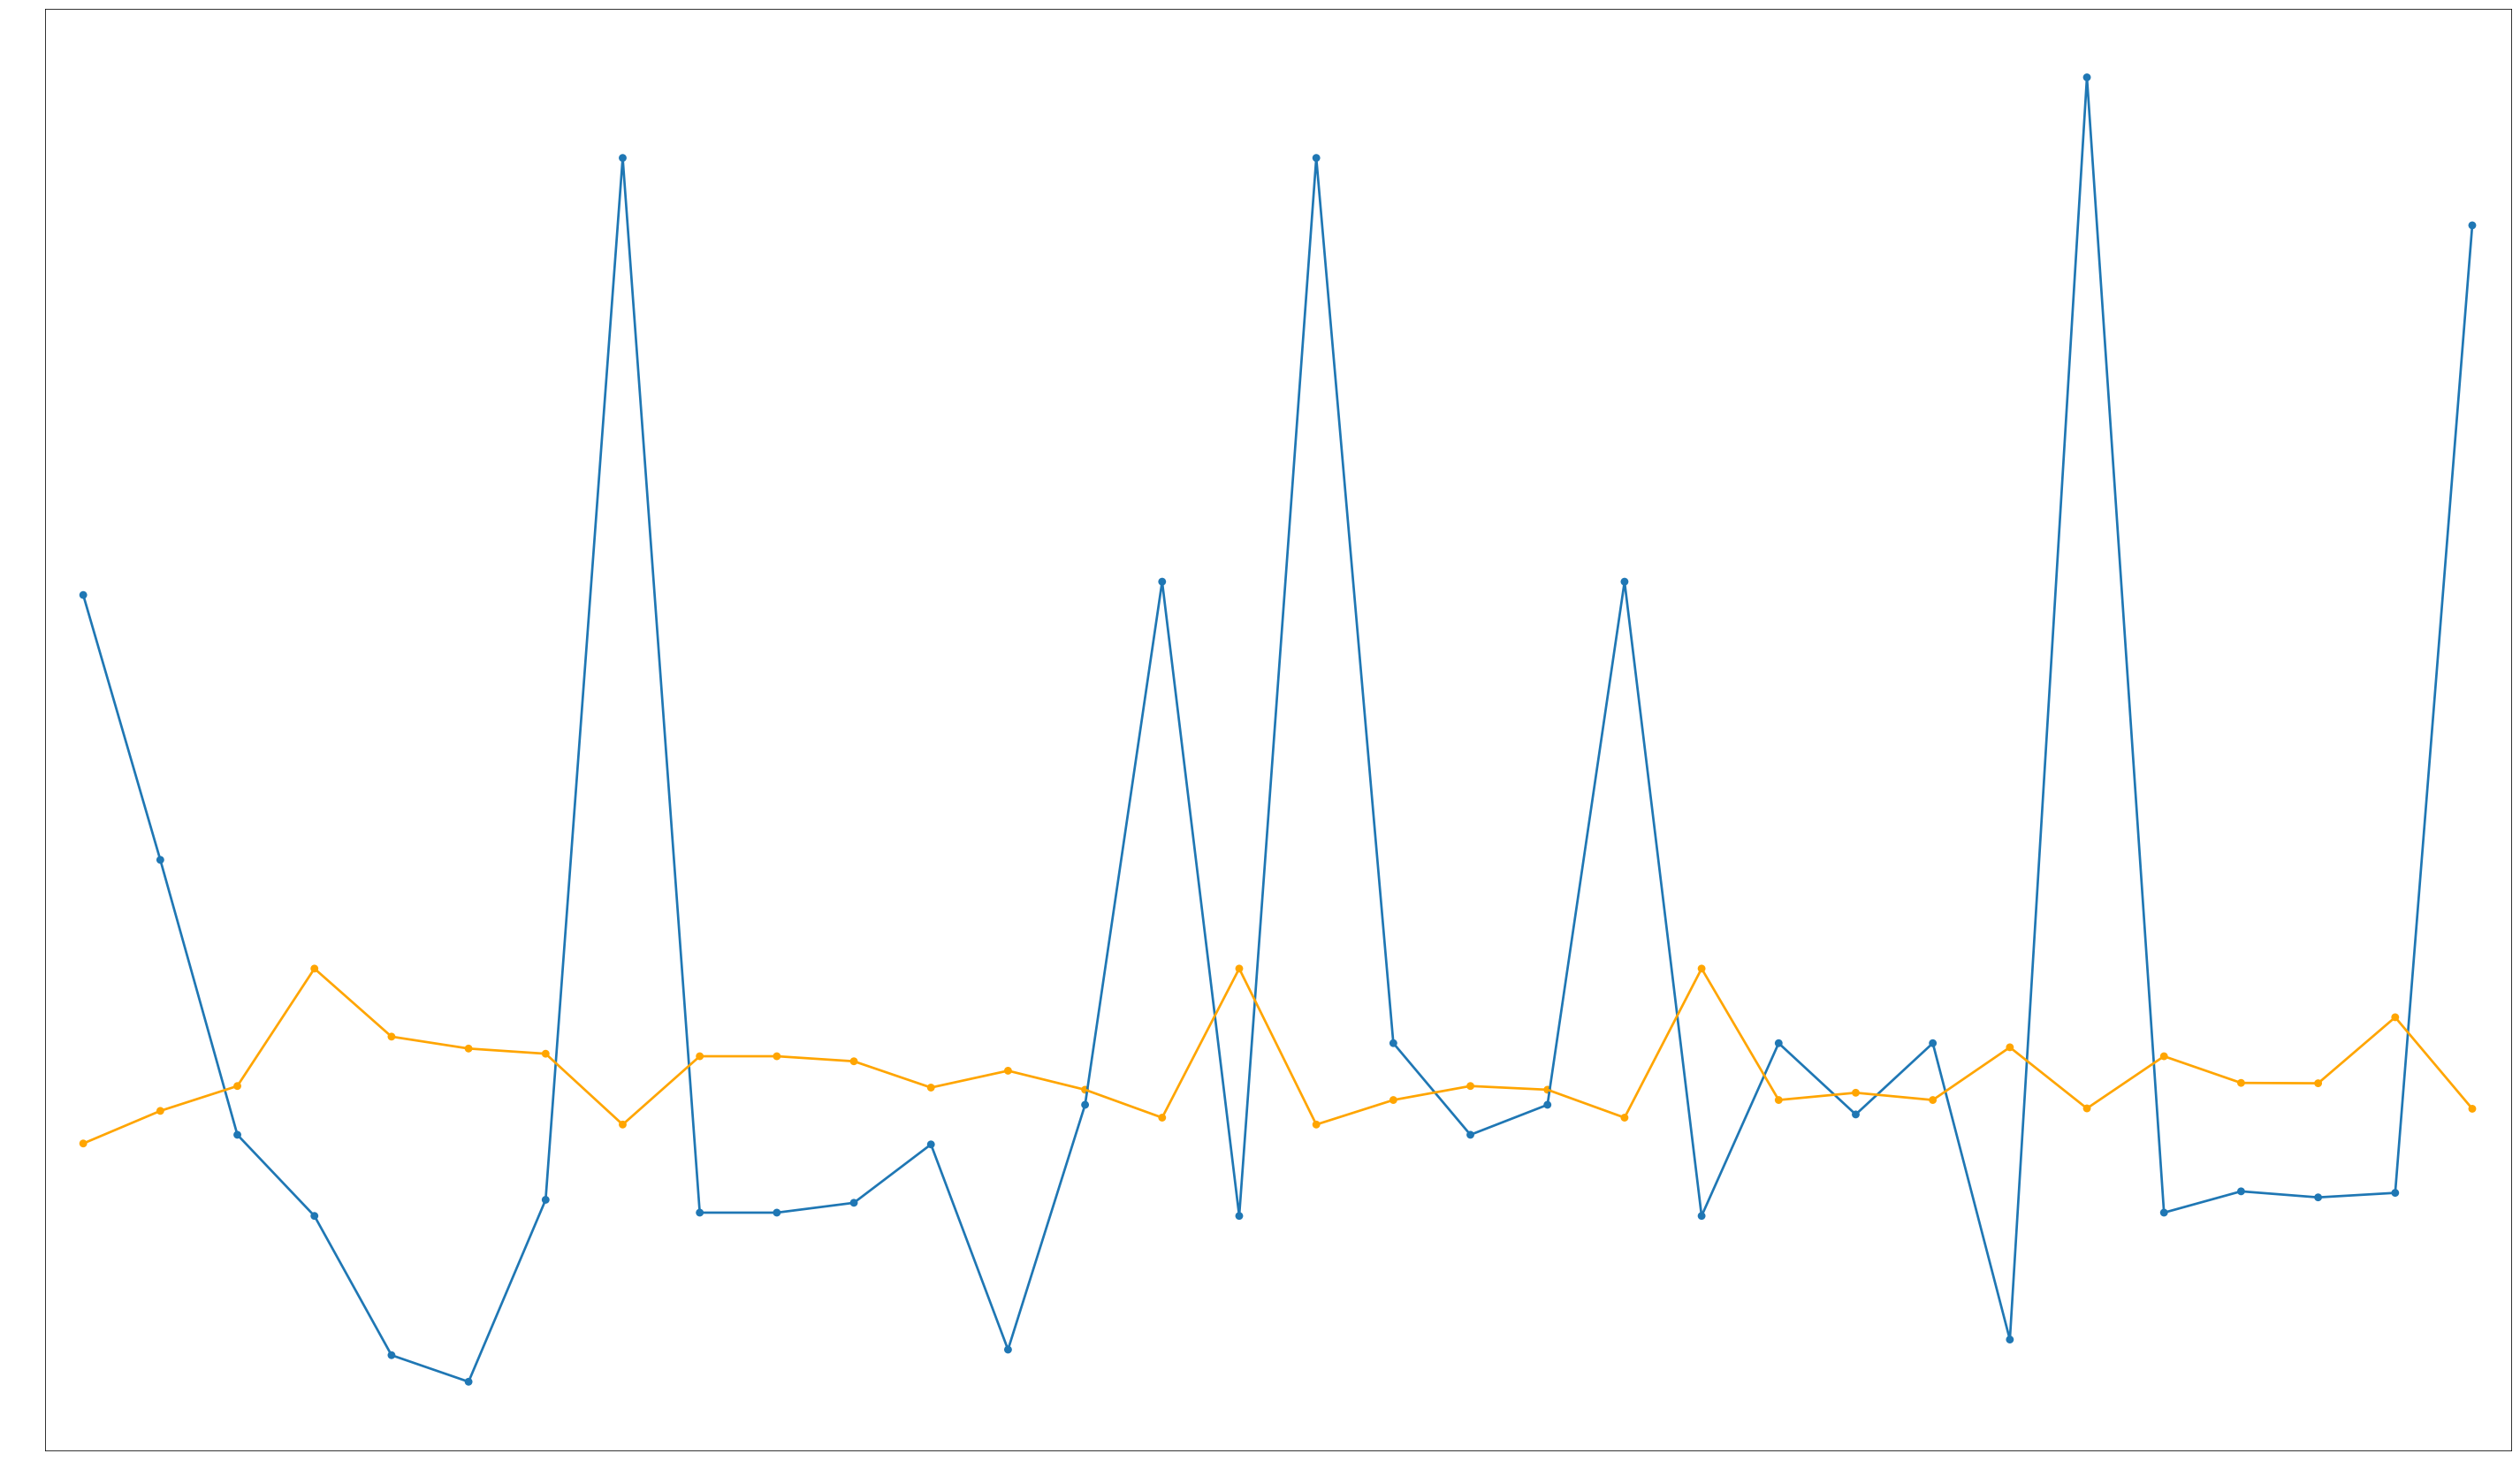

In [32]:
# Keeping all the axis and ticks of white color so that the graph can be opened as image in new tab and analyed
plt.figure(figsize=(50, 30))
ax = plt.subplot(111)

ax.yaxis.label.set_color('white')
ax.xaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

sns.pointplot(x='term', y='present open rate', data=term_open_rate_df);
sns.pointplot(x='term', y='absent open rate', data=term_open_rate_df, color='orange');

#### Let's just keep the terms where open rate differs by at least 0.75 in case of present and absent

In [33]:
term_open_rates = []

for feature in feature_list:
    group = (train.groupby(feature)['is_open'].sum() / train.groupby(feature)['is_open'].count())
    
    if len(group) == 2:
        present = group.get_values()[1]
        absent = group.get_values()[0]
        
        if abs(present - absent) >= 0.075:
            term_dict = {
                'term': feature,
                'present open rate': present,
                'absent open rate': absent
            }
            term_open_rates.append(term_dict)

In [34]:
term_open_rate_df = pd.DataFrame(term_open_rates)
term_open_rate_df.head()

,absent open rate,present open rate,term
0,0.090276,0.201196,2018
1,0.094105,0.289584,inr
2,0.095501,0.203888,scientist
3,0.094105,0.289584,win
4,0.095501,0.203888,data scientist


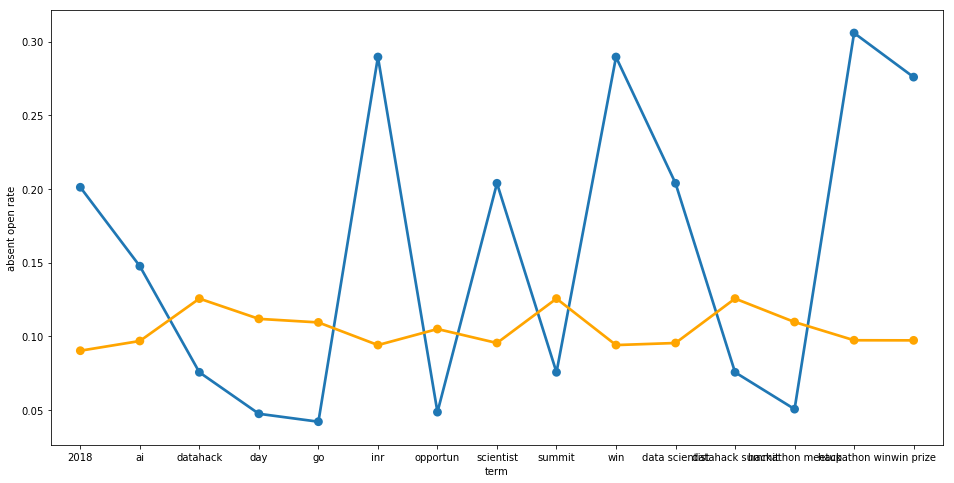

In [51]:
# Keeping all the axis and ticks of white color so that the graph can be opened as image in new tab and analyed
plt.figure(figsize=(16, 8))
ax = plt.subplot(111)

# ax.yaxis.label.set_color('white')
# ax.xaxis.label.set_color('white')
# ax.tick_params(axis='x', colors='white')
# ax.tick_params(axis='y', colors='white')

# ax.set_ylabel('Open Rate')

sns.pointplot(x='term', y='present open rate', data=term_open_rate_df, ax=ax);
sns.pointplot(x='term', y='absent open rate', data=term_open_rate_df, color='orange', ax=ax);

In [36]:
# Difference >= 0.05
term_open_rates = []

for feature in feature_list:
    group = (train.groupby(feature)['is_open'].sum() / train.groupby(feature)['is_open'].count())
    
    if len(group) == 2:
        present = group.get_values()[1]
        absent = group.get_values()[0]
        
        if abs(present - absent) >= 0.05:
            term_dict = {
                'term': feature,
                'present open rate': present,
                'absent open rate': absent
            }
            term_open_rates.append(term_dict)

In [37]:
term_open_rate_df = pd.DataFrame(term_open_rates)
term_open_rate_df.head()

,absent open rate,present open rate,term
0,0.090276,0.201196,2018
1,0.096868,0.147632,ai
2,0.125645,0.075624,datahack
3,0.111886,0.047467,day
4,0.109475,0.042093,go


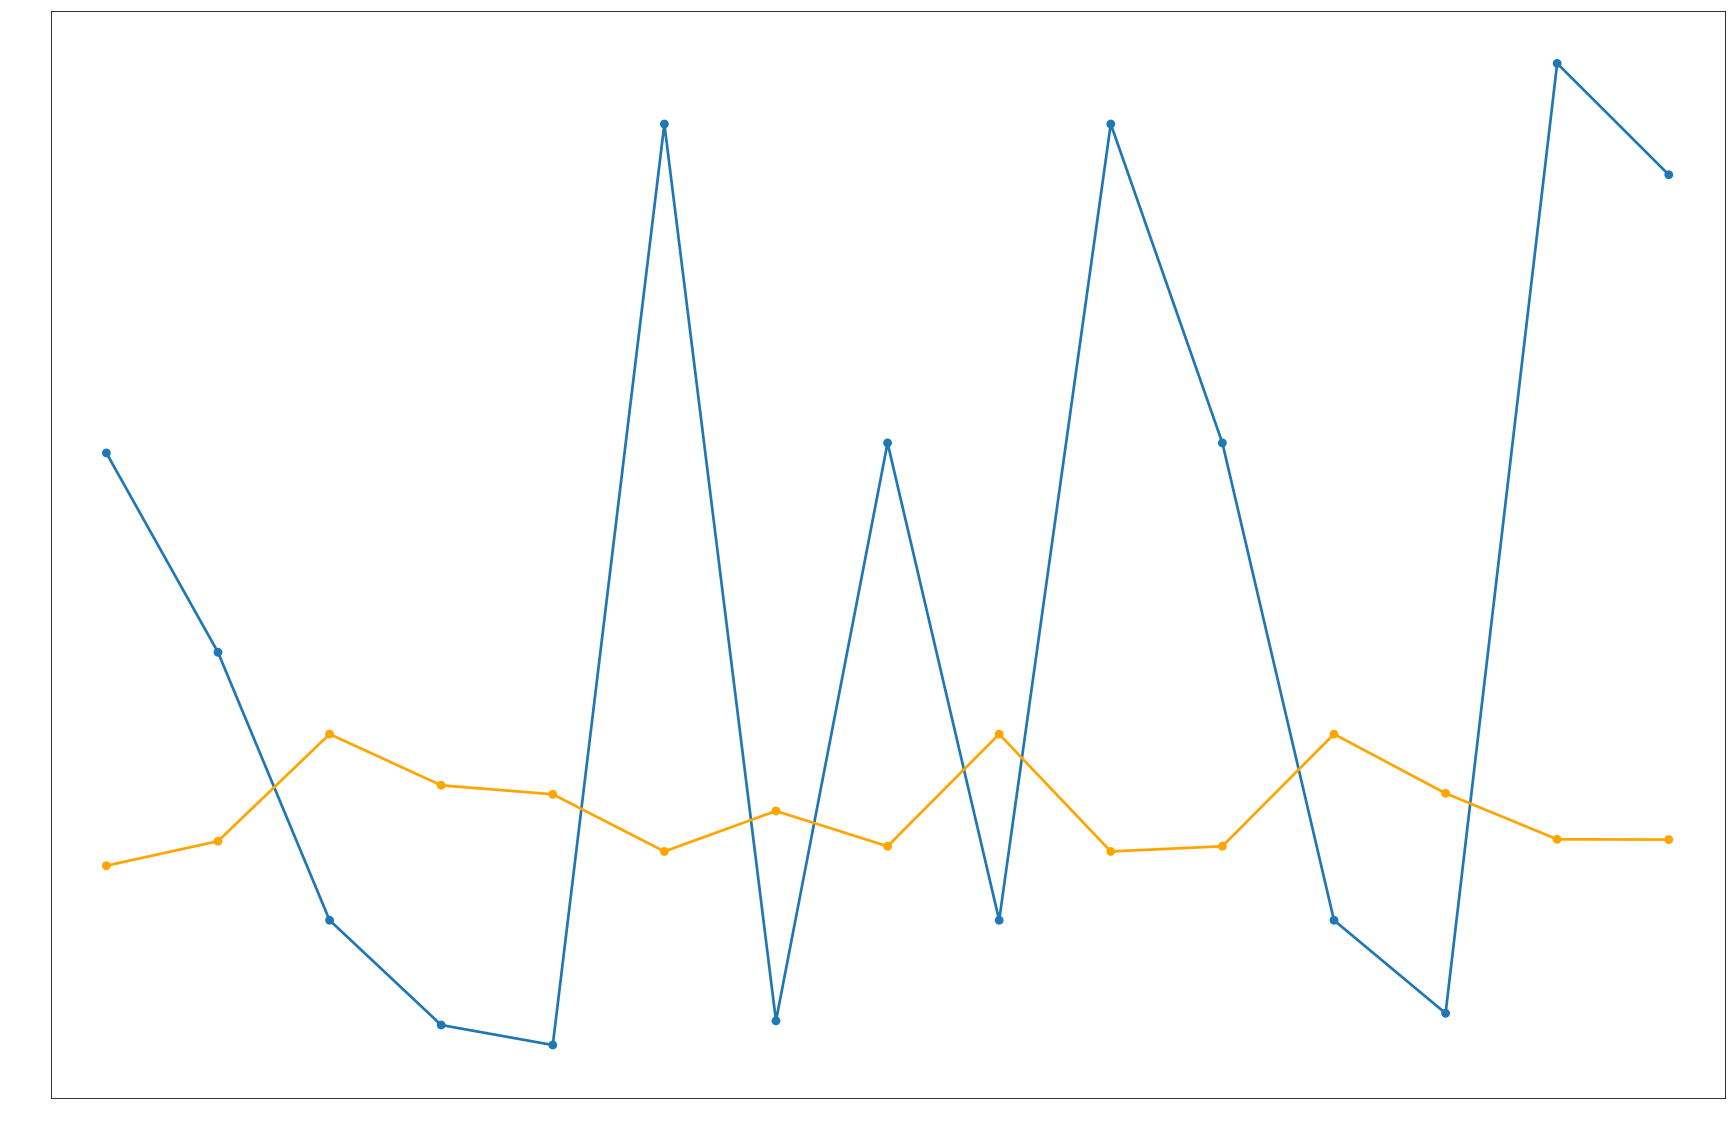

In [38]:
plt.figure(figsize=(30, 20))
ax = plt.subplot(111)

ax.yaxis.label.set_color('white')
ax.xaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

sns.pointplot(x='term', y='present open rate', data=term_open_rate_df);
sns.pointplot(x='term', y='absent open rate', data=term_open_rate_df, color='orange');

### These features look good for open rate
#### Let's check for click rates

In [39]:
# Difference >= 0.05
term_click_rates = []

for feature in feature_list:
    group = (train[(train['is_open'] == 1)].groupby(feature)['is_click'].sum() / train[(train['is_open'] == 1)].groupby(feature)['is_click'].count())
    
    if len(group) == 2:
        present = group.get_values()[1]
        absent = group.get_values()[0]
        
        if abs(present - absent) >= 0.05:
            term_dict = {
                'term': feature,
                'present clcik rate': present,
                'absent click rate': absent
            }
            term_click_rates.append(term_dict)

In [40]:
term_click_rates_df = pd.DataFrame(term_click_rates)
term_click_rates_df.head()

,absent click rate,present clcik rate,term
0,0.140889,0.050950,2018
1,0.130326,0.072872,ai
2,0.114403,0.233109,day
3,0.116399,0.258244,go
4,0.104627,0.197758,hackathon


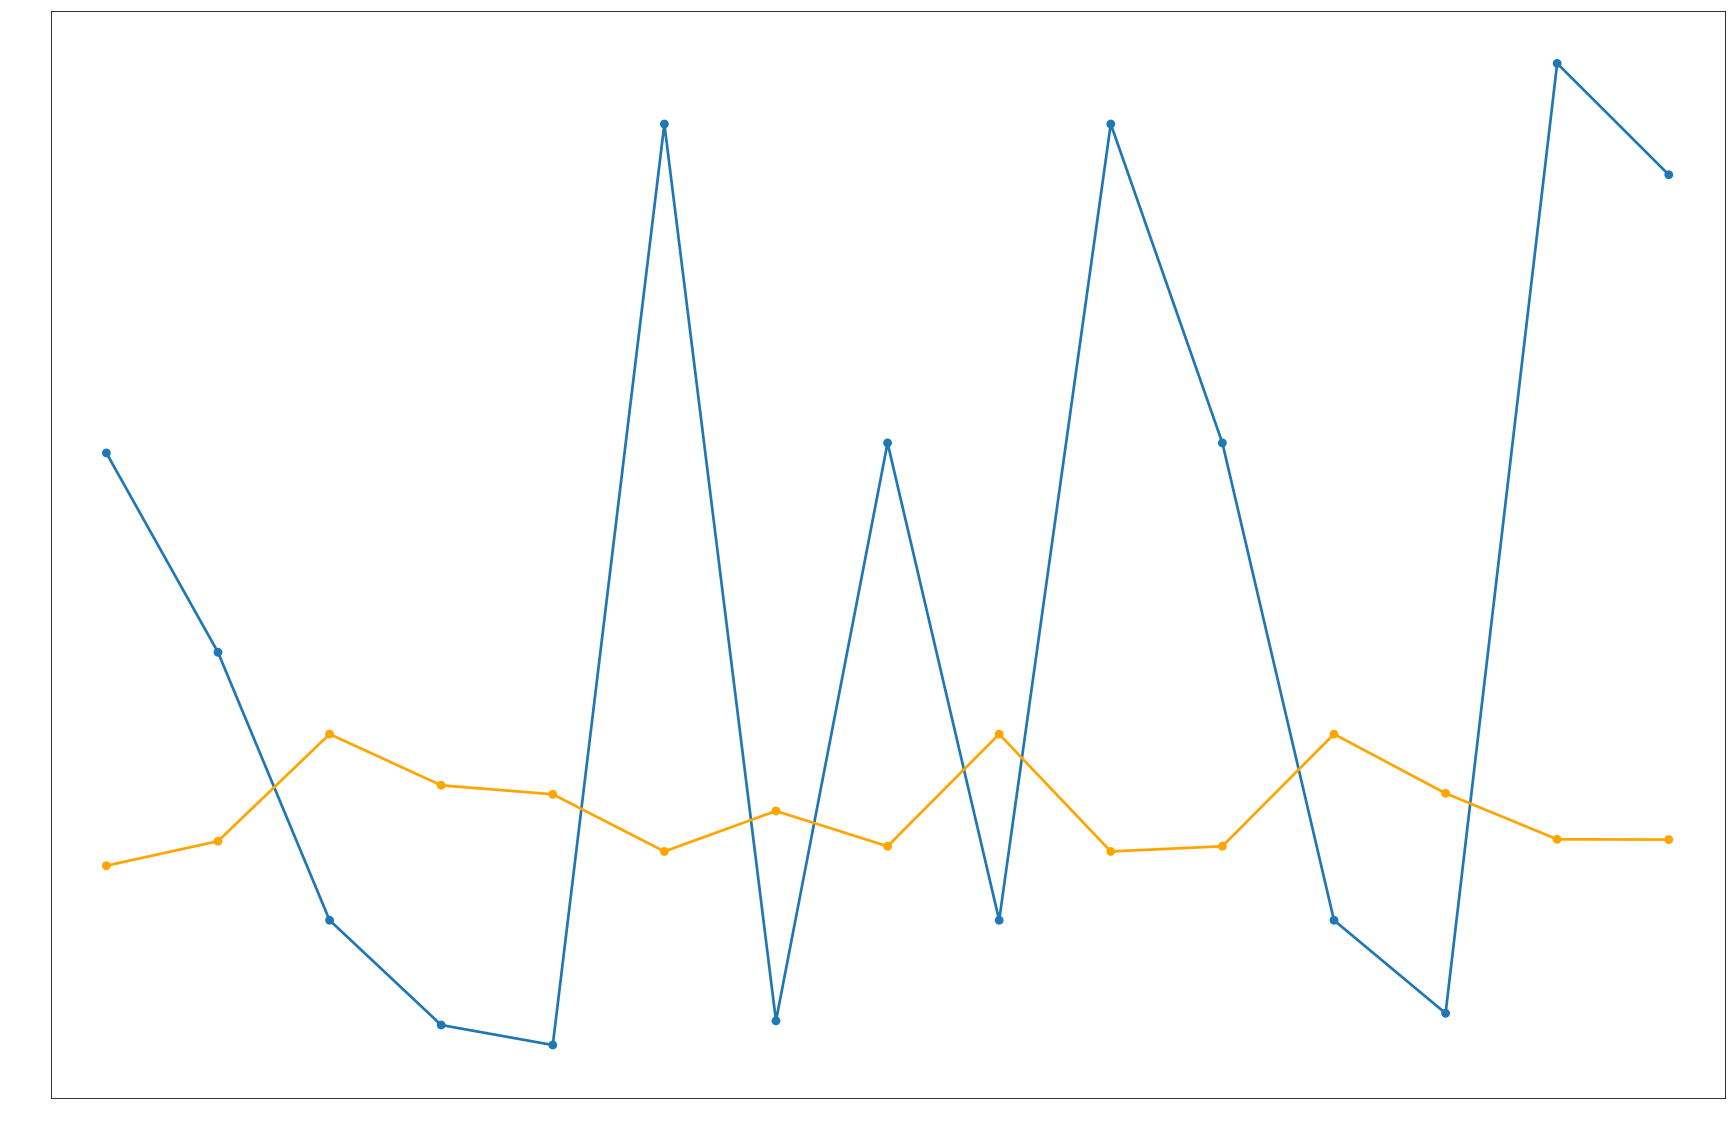

In [41]:
plt.figure(figsize=(30, 20))
ax = plt.subplot(111)

ax.yaxis.label.set_color('white')
ax.xaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

sns.pointplot(x='term', y='present open rate', data=term_open_rate_df);
sns.pointplot(x='term', y='absent open rate', data=term_open_rate_df, color='orange');

### We can use these features with threshold of 0.05 on both open rates and click on open rates for our model